## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Objective

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [9]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [155]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    cross_validate,
    RandomizedSearchCV
)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
import seaborn as sns

# Set display options to show all rows
pd.set_option('display.max_rows', 50)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Auto-detect width
pd.set_option('display.max_colwidth', None)  # Show full content of each cell

# Example DataFrame
df = pd.DataFrame({'A': range(100), 'B': range(100, 200)})
df  # This will now display all rows


from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

from collections import Counter # To check class distribution
from scipy.stats import uniform, randint # For defining parameter distributions
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

## Import Dataset

In [13]:
#org_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LearnPython/EasyVisa.csv')
org_data = pd.read_csv('EasyVisa.csv')
df = org_data.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [16]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [17]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [19]:
df.shape

(25480, 12)

#### Check the data types of the columns for the dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [24]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


#### Fixing the negative values in number of employees columns

In [26]:
df['no_of_employees']=df['no_of_employees'].abs()

#### Let's check the count of each unique category in each of the categorical variables

In [28]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object'])

# Loop through categorical columns and print counts
for col in categorical_cols:
    print(f"Counts for column '{col}':")
    print(df[col].value_counts())
    print("-" * 30)

Counts for column 'case_id':
case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
------------------------------
Counts for column 'continent':
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
------------------------------
Counts for column 'education_of_employee':
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
------------------------------
Counts for column 'has_job_experience':
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
------------------------------
Counts for column 'requires_job_training':
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
------------------------------
Co

In [29]:
df['case_id'].nunique()

25480

*Case id as such plays no role in data analysis, hence dropping the same

In [31]:
df.drop('case_id',axis=1,inplace=True)

### Univariate Analysis

In [33]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [34]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    max_length = df[feature].astype(str).str.len().max()
    if max_length > 5:
        plt.xticks(rotation=90, fontsize=15)
    else:
        plt.xticks(fontsize=15)

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

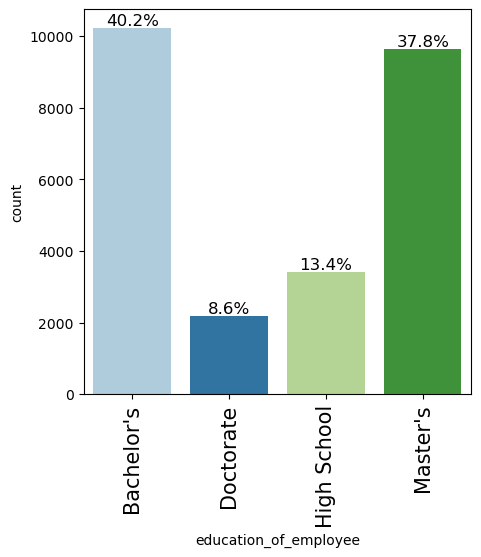

In [36]:
labeled_barplot(df, "education_of_employee", perc=True)

#### Observations on region of employment

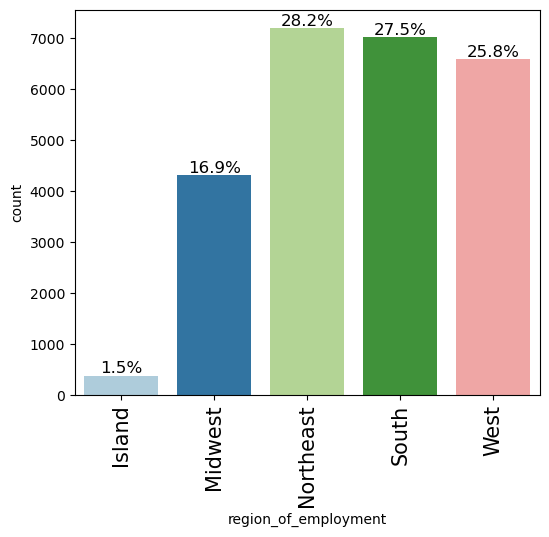

In [38]:
labeled_barplot(df, "region_of_employment", perc=True)

#### Observations on job experience

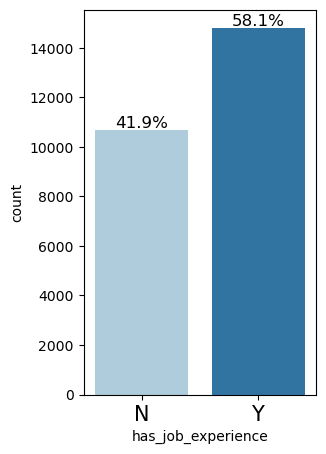

In [40]:
labeled_barplot(df, "has_job_experience", perc=True)

#### Observations on case status

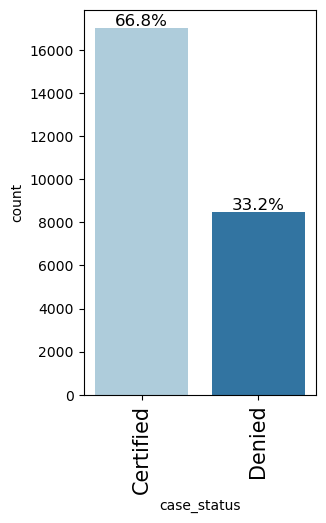

In [42]:
labeled_barplot(df, "case_status", perc=True)

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [45]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [46]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)


    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))

    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


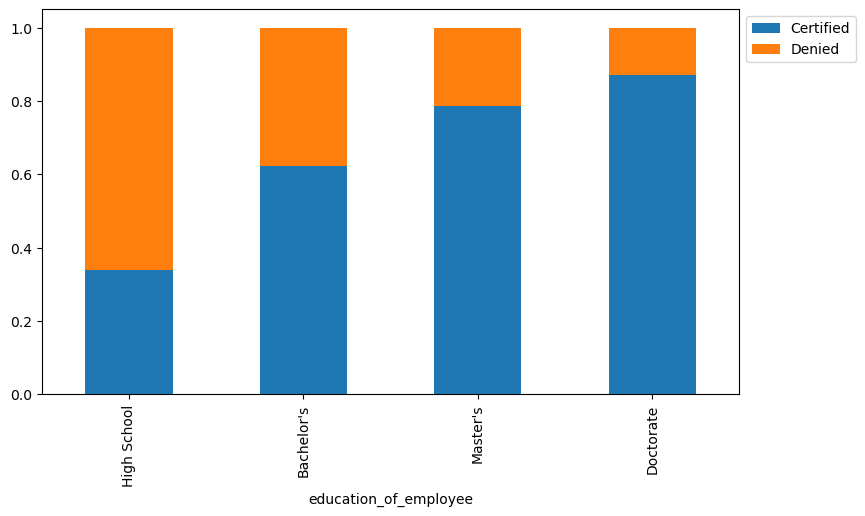

In [48]:
stacked_barplot(df, "education_of_employee", "case_status")

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


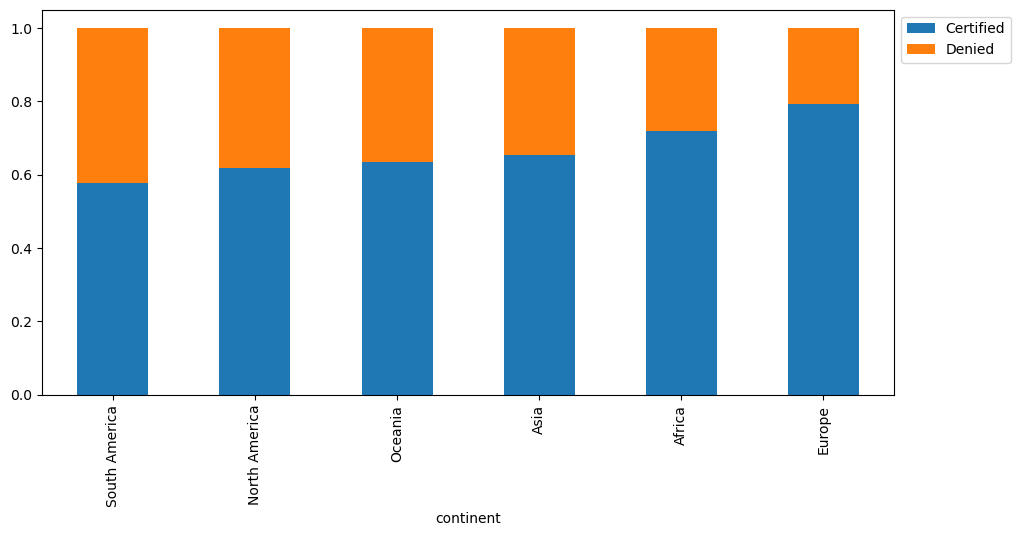

In [50]:
stacked_barplot(df, "continent", "case_status")

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


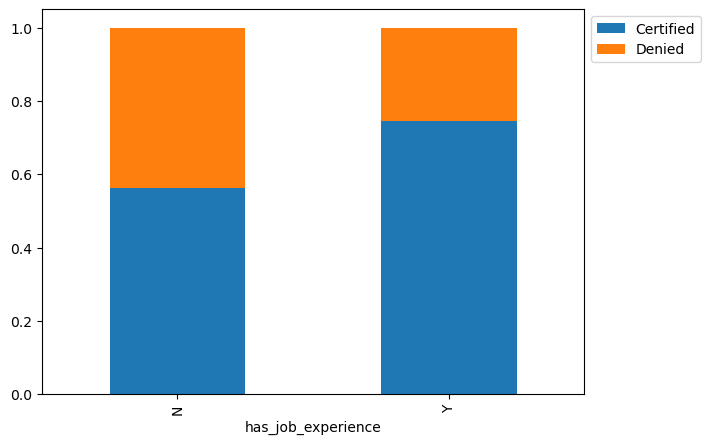

In [52]:
stacked_barplot(df, "has_job_experience", "case_status")

#### Checking if the prevailing wage is similar across all the regions of the US

<Axes: xlabel='region_of_employment', ylabel='prevailing_wage'>

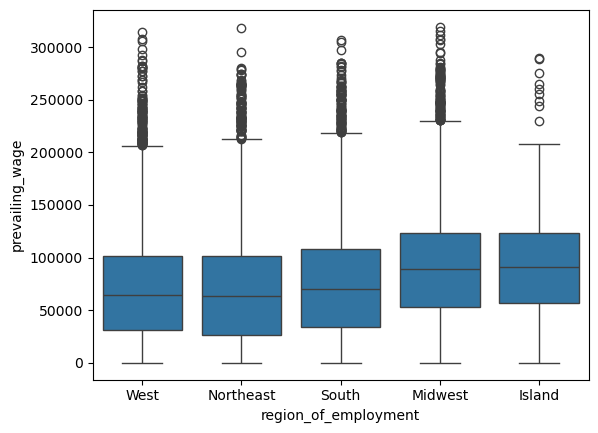

In [54]:
sns.boxplot(x='region_of_employment', y='prevailing_wage', data=df)

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

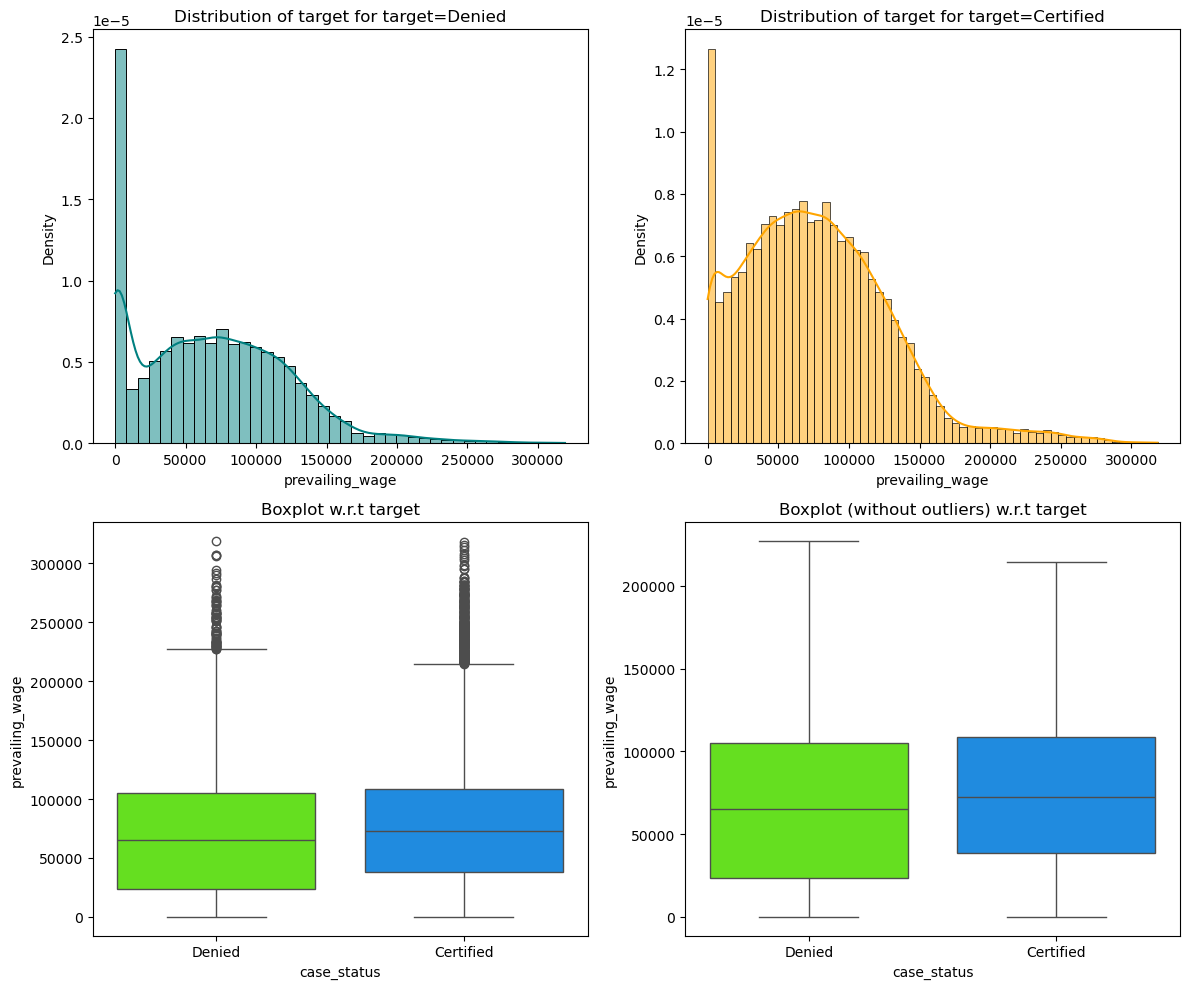

In [56]:
distribution_plot_wrt_target(df,'prevailing_wage','case_status')

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


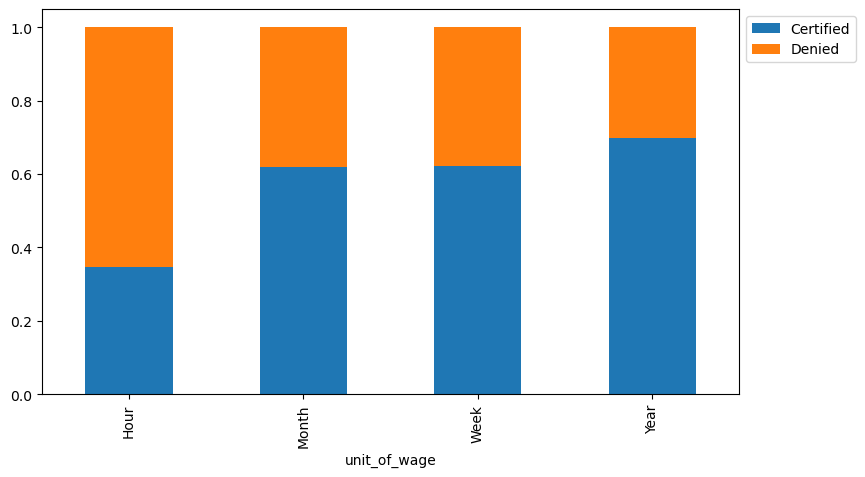

In [58]:
stacked_barplot(df, "unit_of_wage", "case_status")

## Data Pre-processing

### Outlier Check

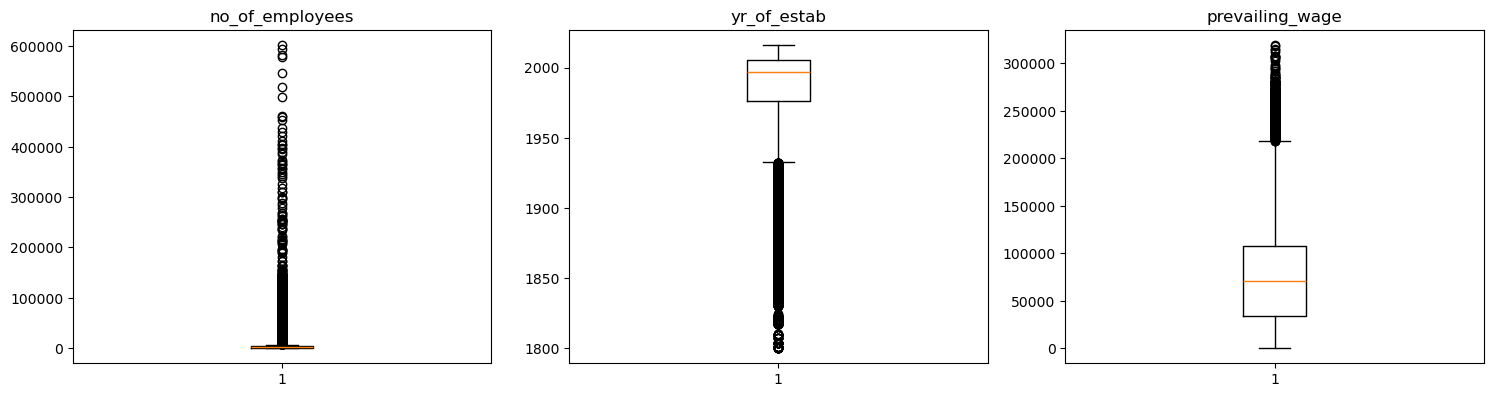

In [61]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 15))

for i, feature in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[feature], whis=1.5)
    plt.tight_layout()
    plt.title(feature)

plt.show()

### Data Preparation for modeling

* Problem statment is to predict visa status.
  - First drop the visa status from data set prepared for training
  - Since case status is caegorical, concerting it into numerical
  - Then convert other categorical values to dummies by encoding
  - Next, prepare and split data set into train and validation set using 70/30 ratio.
  - Then further divide validation and est split in 90/20 ratio

In [64]:
x = df.drop('case_status',axis=1)
y = df['case_status'].apply(lambda x: 1 if x=='Certified' else 0)

# Get categorical columns
categorical_cols = x.select_dtypes(include=['object', 'category']).columns

# Convert to dummy variables
x = pd.get_dummies(x, columns = categorical_cols)

# Split data into train and valid (70:30)
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Split valid into valid and test (90:10)
x_valid, x_test, y_valid, y_test = train_test_split(x_valid, y_valid, test_size=0.1, random_state=42, stratify=y_valid)

* Print the shape of training, validation and test set

In [66]:
print("Training set shape: ", x_train.shape)
print("Validation set shape: ", x_valid.shape)
print("Test set shape: ", x_test.shape)
print("Percentage in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage in validation set:")
print(y_valid.value_counts(normalize=True))
print("Percentage in test set:")
print(y_test.value_counts(normalize=True))

Training set shape:  (17836, 28)
Validation set shape:  (6879, 28)
Test set shape:  (765, 28)
Percentage in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64
Percentage in validation set:
case_status
1    0.66783
0    0.33217
Name: proportion, dtype: float64
Percentage in test set:
case_status
1    0.667974
0    0.332026
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

In [69]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [70]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

*'CERTIFIED' is the positive class:

  - Precision (of 'CERTIFIED' class): How many of the applications model predicted as 'CERTIFIED' were actually 'CERTIFIED'? (Minimizes false positives - predicting certified when it should be denied, which wastes OFLC's time).

  - Recall (of 'CERTIFIED' class): How many of the actually 'CERTIFIED' applications did model correctly identify? (Minimizes false negatives - denying a truly certifiable candidate, which means missing out on talent for employers).

  - F1-Score is the harmonic mean of Precision and Recall. It gives a single metric that balances both.

If we only optimize for Precision, we might miss many truly certifiable cases.
If we only optimize for Recall, we might flag too many applications as certifiable that are actually not, increasing the burden on OFLC reviewers.
The F1-score helps us find a balance, which is often ideal when we need to accurately identify positive cases while not missing too many

In [73]:
scorer = metrics.make_scorer(f1_score, greater_is_better=True)

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data

In [76]:
# --- 1. Define the Classifiers ---
# We'll use default or slightly tuned parameters for initial evaluation.
# Hyperparameter tuning would come after identifying promising models.

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Bagging Classifier": BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42, n_jobs=-1), # n_jobs=-1 uses all available cores
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost Classifier": XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, n_estimators=100, random_state=42, n_jobs=-1)
}

# --- 2. Set up Cross-Validation Strategy ---
# StratifiedKFold is essential for imbalanced datasets
N_SPLITS = 5 # A common choice for number of folds
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

# --- 3. Define Scoring Metrics ---
# We'll track F1-score (primary metric), ROC AUC, Precision, and Recall.
# 'pos_label=1' assumes 'Certified' is your positive class (as we encoded it to 1).
scoring_metrics = {
    'f1_score': 'f1', # F1-score for the positive class
    'roc_auc': 'roc_auc', # ROC AUC
    'precision': 'precision', # Precision for the positive class
    'recall': 'recall' # Recall for the positive class
}

# --- 4. Run Cross-Validation and Evaluate Models ---
results = {}

print(f"Running {N_SPLITS}-Fold Stratified Cross-Validation...\n")

for name, model in models.items():
    print(f"Evaluating {name}...")
    cv_results = cross_validate(model, x_train, y_train, cv=skf, scoring=scoring_metrics, n_jobs=-1, verbose=1)

    # Store and print results
    results[name] = {
        'f1_score_mean': cv_results['test_f1_score'].mean(),
        'f1_score_std': cv_results['test_f1_score'].std(),
        'roc_auc_mean': cv_results['test_roc_auc'].mean(),
        'roc_auc_std': cv_results['test_roc_auc'].std(),
        'precision_mean': cv_results['test_precision'].mean(),
        'precision_std': cv_results['test_precision'].std(),
        'recall_mean': cv_results['test_recall'].mean(),
        'recall_std': cv_results['test_recall'].std(),
    }
    print(f"  Mean F1-Score: {results[name]['f1_score_mean']:.4f} (Std: {results[name]['f1_score_std']:.4f})")
    print(f"  Mean ROC AUC: {results[name]['roc_auc_mean']:.4f} (Std: {results[name]['roc_auc_std']:.4f})")
    print(f"  Mean Precision: {results[name]['precision_mean']:.4f} (Std: {results[name]['precision_std']:.4f})")
    print(f"  Mean Recall: {results[name]['recall_mean']:.4f} (Std: {results[name]['recall_std']:.4f})\n")

# --- 5. Summarize Results ---
print("\n--- Cross-Validation Results Summary ---")
results_df = pd.DataFrame(results).T # Transpose to have models as rows
results_df_sorted = results_df.sort_values(by='f1_score_mean', ascending=False)
print(results_df_sorted.to_markdown(floatfmt=".4f"))

Running 5-Fold Stratified Cross-Validation...

Evaluating Decision Tree...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


  Mean F1-Score: 0.7437 (Std: 0.0049)
  Mean ROC AUC: 0.6196 (Std: 0.0033)
  Mean Precision: 0.7483 (Std: 0.0033)
  Mean Recall: 0.7394 (Std: 0.0118)

Evaluating Bagging Classifier...


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


  Mean F1-Score: 0.8031 (Std: 0.0062)
  Mean ROC AUC: 0.7551 (Std: 0.0085)
  Mean Precision: 0.7726 (Std: 0.0058)
  Mean Recall: 0.8361 (Std: 0.0099)

Evaluating Random Forest...


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


  Mean F1-Score: 0.8044 (Std: 0.0067)
  Mean ROC AUC: 0.7590 (Std: 0.0119)
  Mean Precision: 0.7742 (Std: 0.0053)
  Mean Recall: 0.8372 (Std: 0.0107)

Evaluating AdaBoost Classifier...


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


  Mean F1-Score: 0.8187 (Std: 0.0044)
  Mean ROC AUC: 0.7705 (Std: 0.0077)
  Mean Precision: 0.7604 (Std: 0.0063)
  Mean Recall: 0.8868 (Std: 0.0071)

Evaluating Gradient Boosting Classifier...


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
/opt/anaconda3/envs/my_ai_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:31:55] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_48ydvcv9e5/croot/xgboost-split_1748329884729/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/my_ai_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:31:55] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_48ydvcv9e5/croot/xgboost-split_1748329884729/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/my_ai_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:31:55] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_48ydvcv9e5/croot/xgboost-split_174832988472

  Mean F1-Score: 0.8242 (Std: 0.0048)
  Mean ROC AUC: 0.7831 (Std: 0.0080)
  Mean Precision: 0.7802 (Std: 0.0030)
  Mean Recall: 0.8734 (Std: 0.0071)

Evaluating XGBoost Classifier...
  Mean F1-Score: 0.8088 (Std: 0.0060)
  Mean ROC AUC: 0.7621 (Std: 0.0109)
  Mean Precision: 0.7699 (Std: 0.0045)
  Mean Recall: 0.8518 (Std: 0.0087)


--- Cross-Validation Results Summary ---
|                              |   f1_score_mean |   f1_score_std |   roc_auc_mean |   roc_auc_std |   precision_mean |   precision_std |   recall_mean |   recall_std |
|:-----------------------------|----------------:|---------------:|---------------:|--------------:|-----------------:|----------------:|--------------:|-------------:|
| Gradient Boosting Classifier |          0.8242 |         0.0048 |         0.7831 |        0.0080 |           0.7802 |          0.0030 |        0.8734 |       0.0071 |
| AdaBoost Classifier          |          0.8187 |         0.0044 |         0.7705 |        0.0077 |           0.760

/opt/anaconda3/envs/my_ai_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:31:56] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_48ydvcv9e5/croot/xgboost-split_1748329884729/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/my_ai_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:31:56] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_48ydvcv9e5/croot/xgboost-split_1748329884729/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


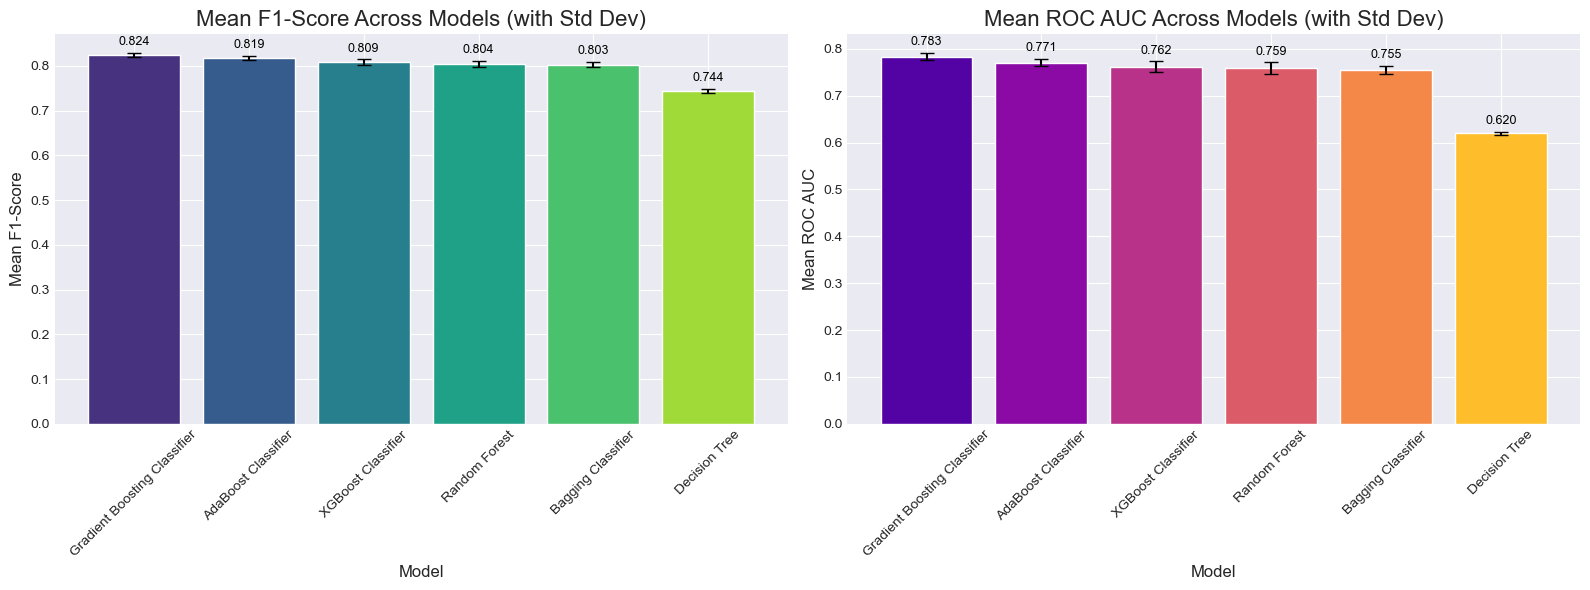

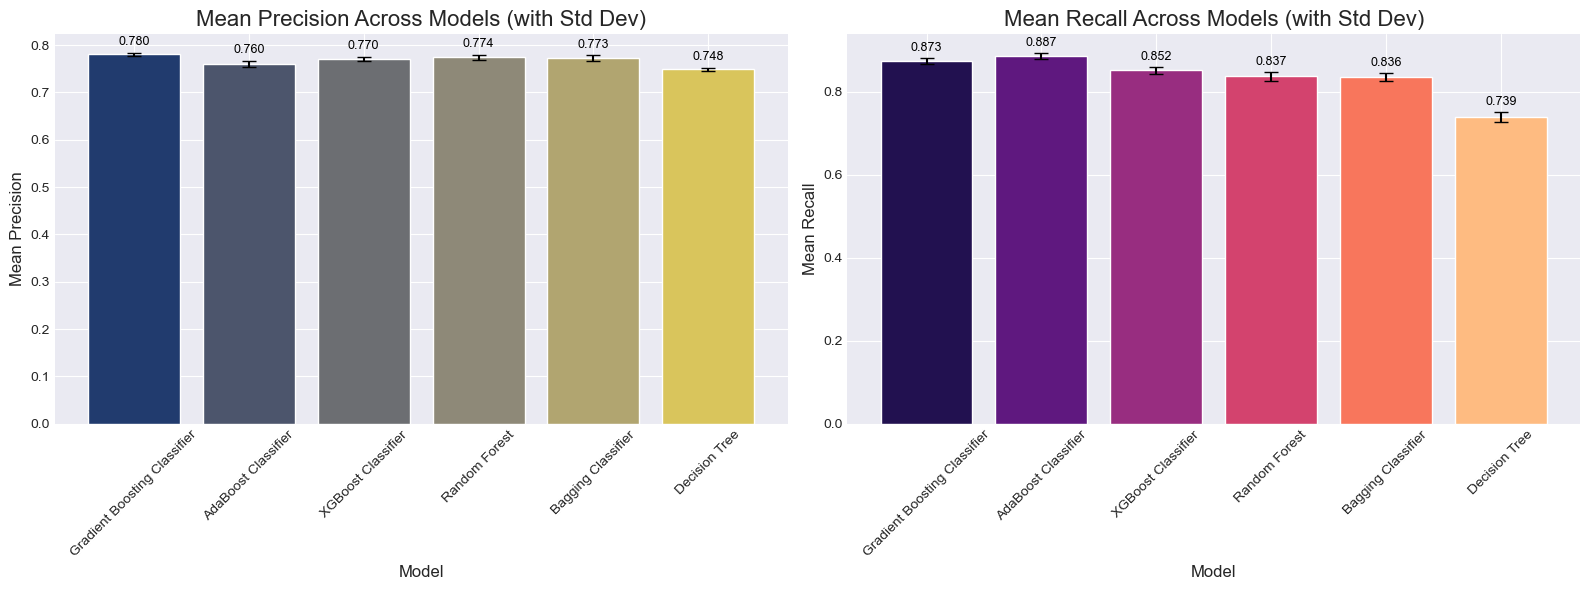

In [77]:
# --- Set up plot style ---
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-darkgrid') # A nice dark grid style

# --- Create the plots ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False) # 1 row, 2 columns of subplots

# Plot 1: Mean F1-Score with Standard Deviation
axes[0].bar(results_df_sorted.index, results_df_sorted['f1_score_mean'],
            yerr=results_df_sorted['f1_score_std'], capsize=5, color=sns.color_palette("viridis", len(results_df_sorted)))
axes[0].set_title('Mean F1-Score Across Models (with Std Dev)', fontsize=16)
axes[0].set_ylabel('Mean F1-Score', fontsize=12)
axes[0].set_xlabel('Model', fontsize=12)
axes[0].tick_params(axis='x', rotation=45, labelsize=10) # Rotate labels for readability
axes[0].set_ylim(bottom=0) # Ensure y-axis starts at 0

# Add text labels for mean F1-score on top of bars
for index, row in results_df_sorted.iterrows():
    axes[0].text(index, row['f1_score_mean'] + row['f1_score_std'] + 0.01, f"{row['f1_score_mean']:.3f}",
                 ha='center', va='bottom', fontsize=9, color='black')


# Plot 2: Mean ROC AUC with Standard Deviation
axes[1].bar(results_df_sorted.index, results_df_sorted['roc_auc_mean'],
            yerr=results_df_sorted['roc_auc_std'], capsize=5, color=sns.color_palette("plasma", len(results_df_sorted)))
axes[1].set_title('Mean ROC AUC Across Models (with Std Dev)', fontsize=16)
axes[1].set_ylabel('Mean ROC AUC', fontsize=12)
axes[1].set_xlabel('Model', fontsize=12)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].set_ylim(bottom=0) # Ensure y-axis starts at 0

# Add text labels for mean ROC AUC on top of bars
for index, row in results_df_sorted.iterrows():
    axes[1].text(index, row['roc_auc_mean'] + row['roc_auc_std'] + 0.01, f"{row['roc_auc_mean']:.3f}",
                 ha='center', va='bottom', fontsize=9, color='black')


plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Plotting Precision and Recall as well
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Plot 3: Mean Precision with Standard Deviation
axes[0].bar(results_df_sorted.index, results_df_sorted['precision_mean'],
            yerr=results_df_sorted['precision_std'], capsize=5, color=sns.color_palette("cividis", len(results_df_sorted)))
axes[0].set_title('Mean Precision Across Models (with Std Dev)', fontsize=16)
axes[0].set_ylabel('Mean Precision', fontsize=12)
axes[0].set_xlabel('Model', fontsize=12)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].set_ylim(bottom=0)
for index, row in results_df_sorted.iterrows():
    axes[0].text(index, row['precision_mean'] + row['precision_std'] + 0.01, f"{row['precision_mean']:.3f}",
                 ha='center', va='bottom', fontsize=9, color='black')


# Plot 4: Mean Recall with Standard Deviation
axes[1].bar(results_df_sorted.index, results_df_sorted['recall_mean'],
            yerr=results_df_sorted['recall_std'], capsize=5, color=sns.color_palette("magma", len(results_df_sorted)))
axes[1].set_title('Mean Recall Across Models (with Std Dev)', fontsize=16)
axes[1].set_ylabel('Mean Recall', fontsize=12)
axes[1].set_xlabel('Model', fontsize=12)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].set_ylim(bottom=0)
for index, row in results_df_sorted.iterrows():
    axes[1].text(index, row['recall_mean'] + row['recall_std'] + 0.01, f"{row['recall_mean']:.3f}",
                 ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

### Model Building with oversampled data

Applying SMOTE to training data...
SMOTE application complete.

--- Class distribution AFTER SMOTE ---
Counter({0: 11913, 1: 11913})


Running 5-Fold Stratified Cross-Validation on OVERSAMPLED data...

Evaluating Decision Tree on oversampled data...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


  Mean F1-Score: 0.7401 (Std: 0.0087)
  Mean ROC AUC: 0.7420 (Std: 0.0084)
  Mean Precision: 0.7457 (Std: 0.0085)
  Mean Recall: 0.7347 (Std: 0.0098)

Evaluating Bagging Classifier on oversampled data...


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


  Mean F1-Score: 0.8000 (Std: 0.0026)
  Mean ROC AUC: 0.8779 (Std: 0.0030)
  Mean Precision: 0.7732 (Std: 0.0036)
  Mean Recall: 0.8286 (Std: 0.0042)

Evaluating Random Forest on oversampled data...


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


  Mean F1-Score: 0.8032 (Std: 0.0043)
  Mean ROC AUC: 0.8813 (Std: 0.0031)
  Mean Precision: 0.7778 (Std: 0.0046)
  Mean Recall: 0.8303 (Std: 0.0063)

Evaluating AdaBoost Classifier on oversampled data...


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


  Mean F1-Score: 0.8083 (Std: 0.0060)
  Mean ROC AUC: 0.8754 (Std: 0.0030)
  Mean Precision: 0.7652 (Std: 0.0073)
  Mean Recall: 0.8565 (Std: 0.0070)

Evaluating Gradient Boosting Classifier on oversampled data...


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


  Mean F1-Score: 0.8188 (Std: 0.0029)
  Mean ROC AUC: 0.8880 (Std: 0.0025)
  Mean Precision: 0.7758 (Std: 0.0031)
  Mean Recall: 0.8670 (Std: 0.0035)

Evaluating XGBoost Classifier on oversampled data...
  Mean F1-Score: 0.8102 (Std: 0.0031)
  Mean ROC AUC: 0.8813 (Std: 0.0023)
  Mean Precision: 0.7742 (Std: 0.0042)
  Mean Recall: 0.8497 (Std: 0.0032)


--- Cross-Validation Results Summary (Oversampled Data) ---
|                              |   f1_score_mean |   f1_score_std |   roc_auc_mean |   roc_auc_std |   precision_mean |   precision_std |   recall_mean |   recall_std |
|:-----------------------------|----------------:|---------------:|---------------:|--------------:|-----------------:|----------------:|--------------:|-------------:|
| Gradient Boosting Classifier |          0.8188 |         0.0029 |         0.8880 |        0.0025 |           0.7758 |          0.0031 |        0.8670 |       0.0035 |
| XGBoost Classifier           |          0.8102 |         0.0031 |         0

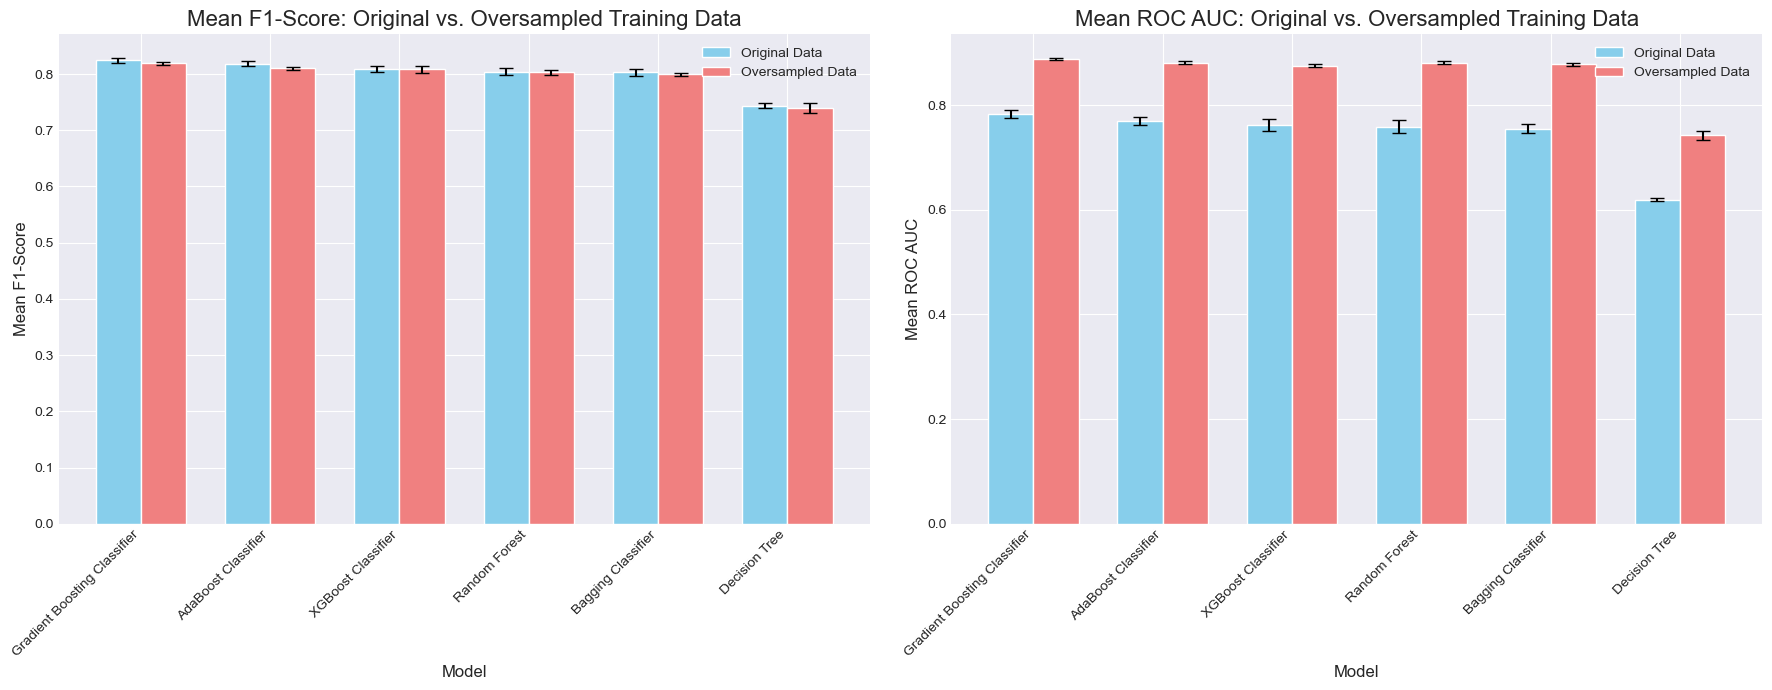

In [79]:
# --- 1. Apply SMOTE to the training data ---
# Instantiate SMOTE
# random_state for reproducibility of synthetic sample generation
smote = SMOTE(random_state=42)

# Apply SMOTE to x_train and y_train
print("Applying SMOTE to training data...")
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print("SMOTE application complete.\n")

print("--- Class distribution AFTER SMOTE ---")
print(Counter(y_train_resampled))
print("\n")

# --- 2. Define the Classifiers  ---
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Bagging Classifier": BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42, n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost Classifier": XGBClassifier(objective='binary:logistic', eval_metric='logloss', n_estimators=100, random_state=42, n_jobs=-1)
}

# --- 3. Set up Cross-Validation Strategy ---
# StratifiedKFold is still good practice, even with ostensibly balanced data post-SMOTE
N_SPLITS = 5
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

# --- 4. Define Scoring Metrics ---
scoring_metrics = {
    'f1_score': 'f1',
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'recall': 'recall'
}

# --- 5. Run Cross-Validation on RESAMPLED Data ---
results_oversampled = {}

print(f"Running {N_SPLITS}-Fold Stratified Cross-Validation on OVERSAMPLED data...\n")

for name, model in models.items():
    print(f"Evaluating {name} on oversampled data...")
    
    cv_results = cross_validate(model, x_train_resampled, y_train_resampled, cv=skf, scoring=scoring_metrics, n_jobs=-1, verbose=1)

    results_oversampled[name] = {
        'f1_score_mean': cv_results['test_f1_score'].mean(),
        'f1_score_std': cv_results['test_f1_score'].std(),
        'roc_auc_mean': cv_results['test_roc_auc'].mean(),
        'roc_auc_std': cv_results['test_roc_auc'].std(),
        'precision_mean': cv_results['test_precision'].mean(),
        'precision_std': cv_results['test_precision'].std(),
        'recall_mean': cv_results['test_recall'].mean(),
        'recall_std': cv_results['test_recall'].std(),
    }
    print(f"  Mean F1-Score: {results_oversampled[name]['f1_score_mean']:.4f} (Std: {results_oversampled[name]['f1_score_std']:.4f})")
    print(f"  Mean ROC AUC: {results_oversampled[name]['roc_auc_mean']:.4f} (Std: {results_oversampled[name]['roc_auc_std']:.4f})")
    print(f"  Mean Precision: {results_oversampled[name]['precision_mean']:.4f} (Std: {results_oversampled[name]['precision_std']:.4f})")
    print(f"  Mean Recall: {results_oversampled[name]['recall_mean']:.4f} (Std: {results_oversampled[name]['recall_std']:.4f})\n")

# --- 6. Summarize Results from Oversampled Data ---
print("\n--- Cross-Validation Results Summary (Oversampled Data) ---")
results_oversampled_df_sorted = pd.DataFrame(results_oversampled).T.sort_values(by='f1_score_mean', ascending=False)
print(results_oversampled_df_sorted.to_markdown(floatfmt=".4f"))

# --- 7. Plot Results for Comparison (Optional) ---
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-darkgrid')

fig, axes = plt.subplots(1, 2, figsize=(18, 7)) # Increased width for comparison

# Plot 1: Mean F1-Score (Original vs Oversampled)
bar_width = 0.35
r1 = np.arange(len(results_df_sorted.index)) # Positions for original bars
r2 = [x + bar_width for x in r1] # Positions for oversampled bars

axes[0].bar(r1, results_df_sorted['f1_score_mean'], yerr=results_df_sorted['f1_score_std'], capsize=5,
            width=bar_width, label='Original Data', color='skyblue')
axes[0].bar(r2, results_oversampled_df_sorted['f1_score_mean'], yerr=results_oversampled_df_sorted['f1_score_std'], capsize=5,
            width=bar_width, label='Oversampled Data', color='lightcoral')

axes[0].set_title('Mean F1-Score: Original vs. Oversampled Training Data', fontsize=16)
axes[0].set_ylabel('Mean F1-Score', fontsize=12)
axes[0].set_xlabel('Model', fontsize=12)
axes[0].set_xticks([x + bar_width/2 for x in r1]) # Center x-ticks between bars
axes[0].set_xticklabels(results_df_sorted.index, rotation=45, ha='right', fontsize=10)
axes[0].set_ylim(bottom=0)
axes[0].legend()


# Plot 2: Mean ROC AUC (Original vs Oversampled)
axes[1].bar(r1, results_df_sorted['roc_auc_mean'], yerr=results_df_sorted['roc_auc_std'], capsize=5,
            width=bar_width, label='Original Data', color='skyblue')
axes[1].bar(r2, results_oversampled_df_sorted['roc_auc_mean'], yerr=results_oversampled_df_sorted['roc_auc_std'], capsize=5,
            width=bar_width, label='Oversampled Data', color='lightcoral')

axes[1].set_title('Mean ROC AUC: Original vs. Oversampled Training Data', fontsize=16)
axes[1].set_ylabel('Mean ROC AUC', fontsize=12)
axes[1].set_xlabel('Model', fontsize=12)
axes[1].set_xticks([x + bar_width/2 for x in r1])
axes[1].set_xticklabels(results_df_sorted.index, rotation=45, ha='right', fontsize=10)
axes[1].set_ylim(bottom=0)
axes[1].legend()

plt.tight_layout()
plt.show()

### Model Building with undersampled data

In [127]:
# --- 1. Apply Undersampling to the training data ---
# Instantiate RandomUnderSampler
# random_state for reproducibility of sample removal
# 'sampling_strategy='auto'' will balance the classes (make minority = majority)
rus = RandomUnderSampler(random_state=42)

# Apply Random Undersampling to x_train and y_train
print("Applying Random Undersampling to training data...")
x_train_undersampled, y_train_undersampled = rus.fit_resample(x_train, y_train)
print("Random Undersampling application complete.\n")

print("--- Class distribution AFTER Random Undersampling ---")
print(Counter(y_train_undersampled))
print("\n")


# --- 2. Define the Classifiers (same as before) ---
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Bagging Classifier": BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42, n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost Classifier": XGBClassifier(objective='binary:logistic', eval_metric='logloss', n_estimators=100, random_state=42, n_jobs=-1)
}

# --- 3. Set up Cross-Validation Strategy ---
N_SPLITS = 5
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

# --- 4. Define Scoring Metrics ---
scoring_metrics = {
    'f1_score': 'f1',
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'recall': 'recall'
}

# --- 5. Run Cross-Validation on UNDERSAMPLED Data ---
results_undersampled = {}

print(f"Running {N_SPLITS}-Fold Stratified Cross-Validation on UNDERSAMPLED data...\n")

for name, model in models.items():
    print(f"Evaluating {name} on undersampled data...")
    
    cv_results = cross_validate(model, x_train_undersampled, y_train_undersampled, cv=skf, scoring=scoring_metrics, n_jobs=-1, verbose=1)

    results_undersampled[name] = {
        'f1_score_mean': cv_results['test_f1_score'].mean(),
        'f1_score_std': cv_results['test_f1_score'].std(),
        'roc_auc_mean': cv_results['test_roc_auc'].mean(),
        'roc_auc_std': cv_results['test_roc_auc'].std(),
        'precision_mean': cv_results['test_precision'].mean(),
        'precision_std': cv_results['test_precision'].std(),
        'recall_mean': cv_results['test_recall'].mean(),
        'recall_std': cv_results['test_recall'].std(),
    }
    print(f"  Mean F1-Score: {results_undersampled[name]['f1_score_mean']:.4f} (Std: {results_undersampled[name]['f1_score_std']:.4f})")
    print(f"  Mean ROC AUC: {results_undersampled[name]['roc_auc_mean']:.4f} (Std: {results_undersampled[name]['roc_auc_std']:.4f})")
    print(f"  Mean Precision: {results_undersampled[name]['precision_mean']:.4f} (Std: {results_undersampled[name]['precision_std']:.4f})")
    print(f"  Mean Recall: {results_undersampled[name]['recall_mean']:.4f} (Std: {results_undersampled[name]['recall_std']:.4f})\n")

# --- 6. Summarize Results from Undersampled Data ---
print("\n--- Cross-Validation Results Summary (Undersampled Data) ---")
results_undersampled_df_sorted = pd.DataFrame(results_undersampled).T.sort_values(by='f1_score_mean', ascending=False)
print(results_undersampled_df_sorted.to_markdown(floatfmt=".4f"))

Applying Random Undersampling to training data...
Random Undersampling application complete.

--- Class distribution AFTER Random Undersampling ---
Counter({0: 5923, 1: 5923})


Running 5-Fold Stratified Cross-Validation on UNDERSAMPLED data...

Evaluating Decision Tree on undersampled data...
  Mean F1-Score: 0.6266 (Std: 0.0153)
  Mean ROC AUC: 0.6275 (Std: 0.0131)
  Mean Precision: 0.6279 (Std: 0.0118)
  Mean Recall: 0.6254 (Std: 0.0190)

Evaluating Bagging Classifier on undersampled data...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


  Mean F1-Score: 0.6873 (Std: 0.0145)
  Mean ROC AUC: 0.7534 (Std: 0.0094)
  Mean Precision: 0.6890 (Std: 0.0097)
  Mean Recall: 0.6858 (Std: 0.0209)

Evaluating Random Forest on undersampled data...


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


  Mean F1-Score: 0.6861 (Std: 0.0075)
  Mean ROC AUC: 0.7538 (Std: 0.0095)
  Mean Precision: 0.6907 (Std: 0.0066)
  Mean Recall: 0.6818 (Std: 0.0138)

Evaluating AdaBoost Classifier on undersampled data...


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


  Mean F1-Score: 0.7027 (Std: 0.0087)
  Mean ROC AUC: 0.7690 (Std: 0.0087)
  Mean Precision: 0.6847 (Std: 0.0113)
  Mean Recall: 0.7219 (Std: 0.0132)

Evaluating Gradient Boosting Classifier on undersampled data...
  Mean F1-Score: 0.7126 (Std: 0.0118)
  Mean ROC AUC: 0.7772 (Std: 0.0087)
  Mean Precision: 0.6994 (Std: 0.0115)
  Mean Recall: 0.7265 (Std: 0.0154)

Evaluating XGBoost Classifier on undersampled data...
  Mean F1-Score: 0.6868 (Std: 0.0148)
  Mean ROC AUC: 0.7536 (Std: 0.0122)
  Mean Precision: 0.6827 (Std: 0.0095)
  Mean Recall: 0.6910 (Std: 0.0210)


--- Cross-Validation Results Summary (Undersampled Data) ---
|                              |   f1_score_mean |   f1_score_std |   roc_auc_mean |   roc_auc_std |   precision_mean |   precision_std |   recall_mean |   recall_std |
|:-----------------------------|----------------:|---------------:|---------------:|--------------:|-----------------:|----------------:|--------------:|-------------:|
| Gradient Boosting Classifie

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


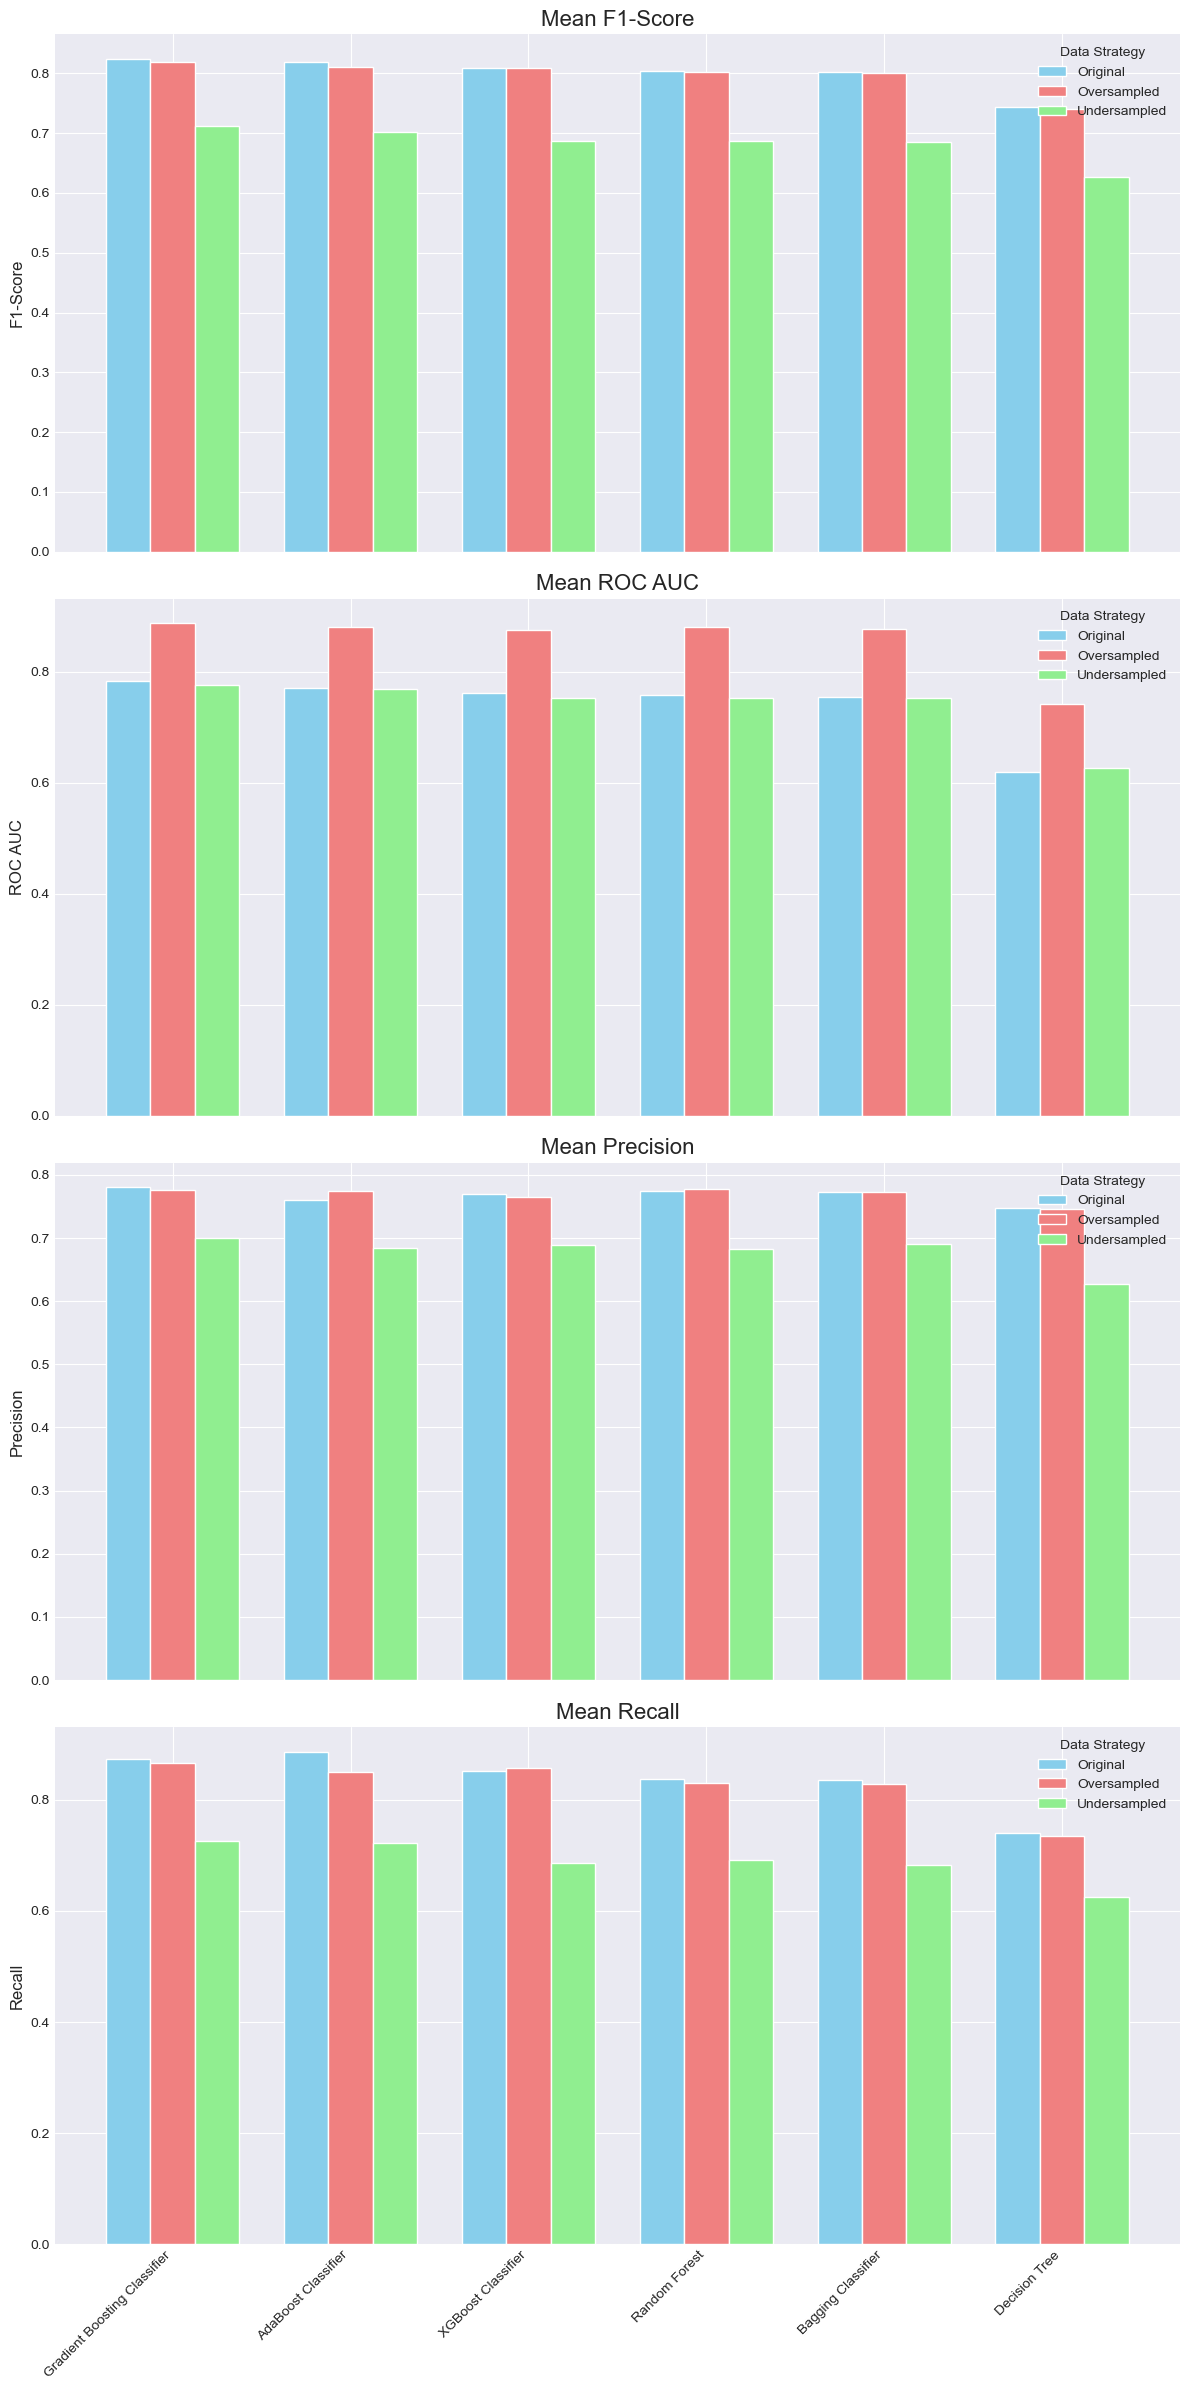

In [129]:
# --- 7. Plot Results for Comprehensive Comparison ---

sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-darkgrid')

# For robust plotting, let's create a combined DataFrame for easier plotting
combined_results = {
    'Original Data': results_df_sorted,
    'Oversampled Data': results_oversampled_df_sorted,
    'Undersampled Data': results_undersampled_df_sorted
}

metrics_to_plot = ['f1_score_mean', 'roc_auc_mean', 'precision_mean', 'recall_mean']
metric_titles = {
    'f1_score_mean': 'Mean F1-Score',
    'roc_auc_mean': 'Mean ROC AUC',
    'precision_mean': 'Mean Precision',
    'recall_mean': 'Mean Recall'
}
y_labels = {
    'f1_score_mean': 'F1-Score',
    'roc_auc_mean': 'ROC AUC',
    'precision_mean': 'Precision',
    'recall_mean': 'Recall'
}

colors = {
    'Original Data': 'skyblue',
    'Oversampled Data': 'lightcoral',
    'Undersampled Data': 'lightgreen'
}

fig, axes = plt.subplots(len(metrics_to_plot), 1, figsize=(12, 6 * len(metrics_to_plot)), sharex=True)

if len(metrics_to_plot) == 1: # Handle case of single subplot for axes indexing
    axes = [axes]

bar_width = 0.25 # Adjust bar width for 3 sets of bars
model_names = results_df_sorted.index # Assumes all DFs have same model order

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i]
    r_base = np.arange(len(model_names))
    r_original = r_base - bar_width
    r_oversampled = r_base
    r_undersampled = r_base + bar_width

    ax.bar(r_original, combined_results['Original Data'][metric], width=bar_width, label='Original', color=colors['Original Data'])
    ax.bar(r_oversampled, combined_results['Oversampled Data'][metric], width=bar_width, label='Oversampled', color=colors['Oversampled Data'])
    ax.bar(r_undersampled, combined_results['Undersampled Data'][metric], width=bar_width, label='Undersampled', color=colors['Undersampled Data'])

    ax.set_title(metric_titles[metric], fontsize=16)
    ax.set_ylabel(y_labels[metric], fontsize=12)
    ax.set_xticks(r_base)
    ax.set_xticklabels(model_names, rotation=45, ha='right', fontsize=10)
    ax.set_ylim(bottom=0)
    ax.legend(title="Data Strategy")

plt.tight_layout()
plt.show()

## Hyperparameter Tuning

## Analysis of Cross-Validation Results & Hyperparameter Tuning Strategy

Having run cross-validation on our models with original, oversampled (SMOTE), and undersampled (Random Undersampler) training data, it's time to analyze the results and decide on the best strategy for hyperparameter tuning. Our primary evaluation metric is **F1-score**, with ROC AUC as a strong secondary indicator.

### 1. Consolidated Results Overview

For easy comparison, let's look at the mean F1-score and ROC AUC for our models across the different data strategies:

| Model Name                 | Metric     | Original Data (Mean) | Oversampled Data (Mean) | Undersampled Data (Mean) |
| :------------------------- | :--------- | :------------------- | :---------------------- | :----------------------- |
| **Gradient Boosting Classifier** | F1-Score   | **0.8242** | 0.8188                  | 0.7126                   |
|                            | ROC AUC    | 0.7831               | **0.8880** | 0.7772                   |
| **AdaBoost Classifier** | F1-Score   | 0.8187               | 0.8083                  | 0.7027                   |
|                            | ROC AUC    | 0.7705               | 0.8754                  | 0.7690                   |
| **XGBoost Classifier** | F1-Score   | 0.8088               | 0.8102                  | 0.6868                   |
|                            | ROC AUC    | 0.7621               | 0.8813                  | 0.7536                   |
| **Random Forest** | F1-Score   | 0.8044               | 0.8032                  | 0.6861                   |
|                            | ROC AUC    | 0.7590               | 0.8813                  | 0.7538                   |
| **Bagging Classifier** | F1-Score   | 0.8031               | 0.8000                  | 0.6873                   |
|                            | ROC AUC    | 0.7551               | 0.8779                  | 0.7534                   |
| **Decision Tree** | F1-Score   | 0.7437               | 0.7401                  | 0.6266                   |
|                            | ROC AUC    | 0.6196               | 0.7420                  | 0.6275                   |

*(Note: These figures represent the mean scores across 5 cross-validation folds.)*

### 2. Key Observations and Insights

1.  **F1-Score Dominance by Original Data:** Across almost all models, the highest F1-scores were achieved when training on the **Original (imbalanced) Data**. Gradient Boosting Classifier leads this pack with a strong 0.8242 F1-score. This suggests that for maximizing the balance between Precision and Recall at the default threshold, the original data provides the best performance so far.
2.  **ROC AUC Boost from Oversampling:** The **Oversampled Data (SMOTE)** consistently led to a **significant increase in ROC AUC** for all models. This indicates that SMOTE helped the models achieve much better overall discriminative power between the classes. However, this often came with a slight trade-off in F1-score, likely due to a decrease in precision (more false positives) as the models became less biased towards the majority class.
3.  **Undersampling's Performance:** The **Undersampled Data** consistently resulted in the **lowest F1-scores and generally lower ROC AUCs**. This strongly suggests that for this dataset, discarding majority class samples leads to a considerable loss of valuable information, hindering model performance.
4.  **Top Performing Models:** Gradient Boosting Classifier, AdaBoost Classifier, and XGBoost Classifier are the consistent top performers across different data strategies in terms of F1-score and ROC AUC. Random Forest and Bagging Classifier are also strong, but generally slightly behind.

### 3. Recommendation for Hyperparameter Tuning

Based on these results, and prioritizing goal of maximizing **F1-score**, here's the recommended strategy for hyperparameter tuning:

#### A. Primary Focus (Highest F1-Score Potential):

* **Model:** **Gradient Boosting Classifier**
* **Data Strategy for Tuning:** **Original Training Data (`x_train`, `y_train`)**
* **Reasoning:** This combination currently yields the highest F1-score (0.8242). We will tune its hyperparameters to further optimize this performance.

#### B. Secondary Focus (Strong Contenders, High Potential):

* **Model:** **XGBoost Classifier**
* **Data Strategy for Tuning:** **Original Training Data (`x_train`, `y_train`)**
* **Reasoning:** While GBC edged it out slightly on original data F1, XGBoost is known for its high tunability and powerful performance. It's worth tuning on the original data, as that is where its best F1-score was recorded. You could also consider tuning it on oversampled data if, after the primary tuning, you still desire a higher overall discriminative power (ROC AUC) and are willing to fine-tune the decision threshold afterwards.

* **Model:** **AdaBoost Classifier**
* **Data Strategy for Tuning:** **Original Training Data (`x_train`, `y_train`)**
* **Reasoning:** AdaBoost also showed a very competitive F1-score on the original data (0.8187), making it a strong candidate for tuning.

#### C. Models/Strategies NOT to Prioritize for Tuning:

* **Decision Tree:** Consistently the lowest performer; tuning is unlikely to make it competitive with ensemble methods.
* **Bagging Classifier & Random Forest:** While decent, they generally don't surpass GBC or XGBoost in performance once these boosting algorithms are properly tuned.
* **Undersampled Data:** The consistently lower F1-scores and ROC AUCs suggest that undersampling leads to significant information loss for your dataset. Investing tuning time in models trained on undersampled data is not recommended at this stage.

---

**Next Steps:**

We will now proceed with hyperparameter tuning using `RandomizedSearchCV` (or `GridSearchCV` if the search space is small) on the **Gradient Boosting Classifier with the Original Training Data**, optimizing for **F1-score**. After that, we can explore XGBoost and potentially AdaBoost similarly.

In [143]:
# --- Define the Gradient Boosting Classifier ---
gb_model = GradientBoostingClassifier(random_state=42)

# --- Define the Hyperparameter Search Space for GBC ---
# These ranges are common starting points; adjust as needed based on your dataset and resources.
param_distributions_gb = {
    'n_estimators': randint(100, 500),         # Number of boosting stages
    'learning_rate': uniform(0.01, 0.2),       # Step size shrinkage to prevent overfitting
    'max_depth': randint(3, 8),                # Maximum depth of the individual regression estimators
    'subsample': uniform(0.6, 0.4),            # Fraction of samples to be used for fitting the individual base learners
    'min_samples_split': randint(2, 20),       # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10),        # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None, uniform(0.6, 0.4)] # Number of features to consider when looking for the best split
}

# --- Set up RandomizedSearchCV for GBC ---
N_SPLITS = 5
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

# n_iter: Number of parameter settings that are sampled.
# A higher number means a more exhaustive search, but also takes longer.
# Start with 50-100, then increase if promising results are found.
random_search_gb = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_distributions_gb,
    n_iter=75, # Number of different combinations to try. Can increase to 100-200 for more thorough search.
    cv=skf,
    scoring='f1', # Optimize for F1-score
    verbose=2, # Higher verbose for more output during search
    random_state=42,
    n_jobs=-1, # Use all available cores
    refit=True # Refit the best estimator on the entire training data
)

# --- Run the Hyperparameter Search for GBC ---
print(f"Starting Randomized Search for Gradient Boosting Classifier on Original Data (n_iter={random_search_gb.n_iter})...")
random_search_gb.fit(x_train, y_train) # Fit on the ORIGINAL training data
print("Randomized Search for GBC Complete.\n")

# --- Get the Best Results for GBC ---
print("--- Best Hyperparameters Found for Gradient Boosting Classifier ---")
print(f"Best F1-Score: {random_search_gb.best_score_:.4f}")
print("Best Parameters:", random_search_gb.best_params_)

# Store the best estimator
best_gb_model = random_search_gb.best_estimator_
print("\nBest GBC Model (tuned):", best_gb_model)

#Hyperparameter Tuning for XGBoost Classifier
#Now, let's set up and run the tuning for XGBoost, also on the original training data.

# --- Define the XGBoost Classifier ---
# Removed use_label_encoder and set eval_metric as per standard practice
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42, n_jobs=-1)

# --- Define the Hyperparameter Search Space for XGBoost ---
# These ranges are common starting points; adjust as needed.
param_distributions_xgb = {
    'n_estimators': randint(100, 700),           # Number of boosting rounds (trees)
    'learning_rate': uniform(0.01, 0.25),        # Step size shrinkage
    'max_depth': randint(3, 10),                 # Maximum depth of a tree
    'subsample': uniform(0.6, 0.4),              # Subsample ratio of the training instance
    'colsample_bytree': uniform(0.6, 0.4),       # Subsample ratio of columns when constructing each tree
    'gamma': uniform(0, 0.5),                    # Minimum loss reduction required to make a further partition
    'reg_alpha': uniform(0, 0.5),                # L1 regularization term on weights
    'reg_lambda': uniform(0, 0.5),               # L2 regularization term on weights
    'min_child_weight': randint(1, 10),          # Minimum sum of instance weight (hessian) needed in a child
    'scale_pos_weight': [1, (y_train.value_counts()[0] / y_train.value_counts()[1])] # To handle imbalance if chosen,
                                                                               # but for original data, it's often close to 1
}

# --- Set up RandomizedSearchCV for XGBoost ---
N_SPLITS = 5
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions_xgb,
    n_iter=75, # Number of different combinations to try. Can increase to 100-200 for more thorough search.
    cv=skf,
    scoring='f1', # Optimize for F1-score
    verbose=2,
    random_state=42,
    n_jobs=-1,
    refit=True
)

# --- Run the Hyperparameter Search for XGBoost ---
print(f"Starting Randomized Search for XGBoost Classifier on Original Data (n_iter={random_search_xgb.n_iter})...")
random_search_xgb.fit(x_train, y_train) # Fit on the ORIGINAL training data
print("Randomized Search for XGBoost Complete.\n")

# --- Get the Best Results for XGBoost ---
print("--- Best Hyperparameters Found for XGBoost Classifier ---")
print(f"Best F1-Score: {random_search_xgb.best_score_:.4f}")
print("Best Parameters:", random_search_xgb.best_params_)

# Store the best estimator
best_xgb_model = random_search_xgb.best_estimator_
print("\nBest XGBoost Model (tuned):", best_xgb_model)

Starting Randomized Search for Gradient Boosting Classifier on Original Data (n_iter=75)...
Fitting 5 folds for each of 75 candidates, totalling 375 fits
Randomized Search for GBC Complete.

--- Best Hyperparameters Found for Gradient Boosting Classifier ---
Best F1-Score: 0.8260
Best Parameters: {'learning_rate': np.float64(0.038598336410567174), 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 106, 'subsample': np.float64(0.7704365900187764)}

Best GBC Model (tuned): GradientBoostingClassifier(learning_rate=np.float64(0.038598336410567174),
                           max_depth=4, max_features='log2',
                           min_samples_split=7, n_estimators=106,
                           random_state=42,
                           subsample=np.float64(0.7704365900187764))
Starting Randomized Search for XGBoost Classifier on Original Data (n_iter=75)...
Fitting 5 folds for each of 75 candidates, totalling 375 fits
Randomized Se

## Model Performances

--- Evaluating Tuned Models on Validation Set ---

Evaluating Tuned Gradient Boosting Classifier...
  F1-Score: 0.8224
  ROC AUC: 0.7732
  Precision: 0.7666
  Recall: 0.8870
  Accuracy: 0.7441
  Confusion Matrix:
 [[1044 1241]
 [ 519 4075]]
  Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.46      0.54      2285
           1       0.77      0.89      0.82      4594

    accuracy                           0.74      6879
   macro avg       0.72      0.67      0.68      6879
weighted avg       0.73      0.74      0.73      6879


Evaluating Tuned XGBoost Classifier...
  F1-Score: 0.8210
  ROC AUC: 0.7756
  Precision: 0.7747
  Recall: 0.8733
  Accuracy: 0.7457
  Confusion Matrix:
 [[1118 1167]
 [ 582 4012]]
  Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.49      0.56      2285
           1       0.77      0.87      0.82      4594

    accuracy                       

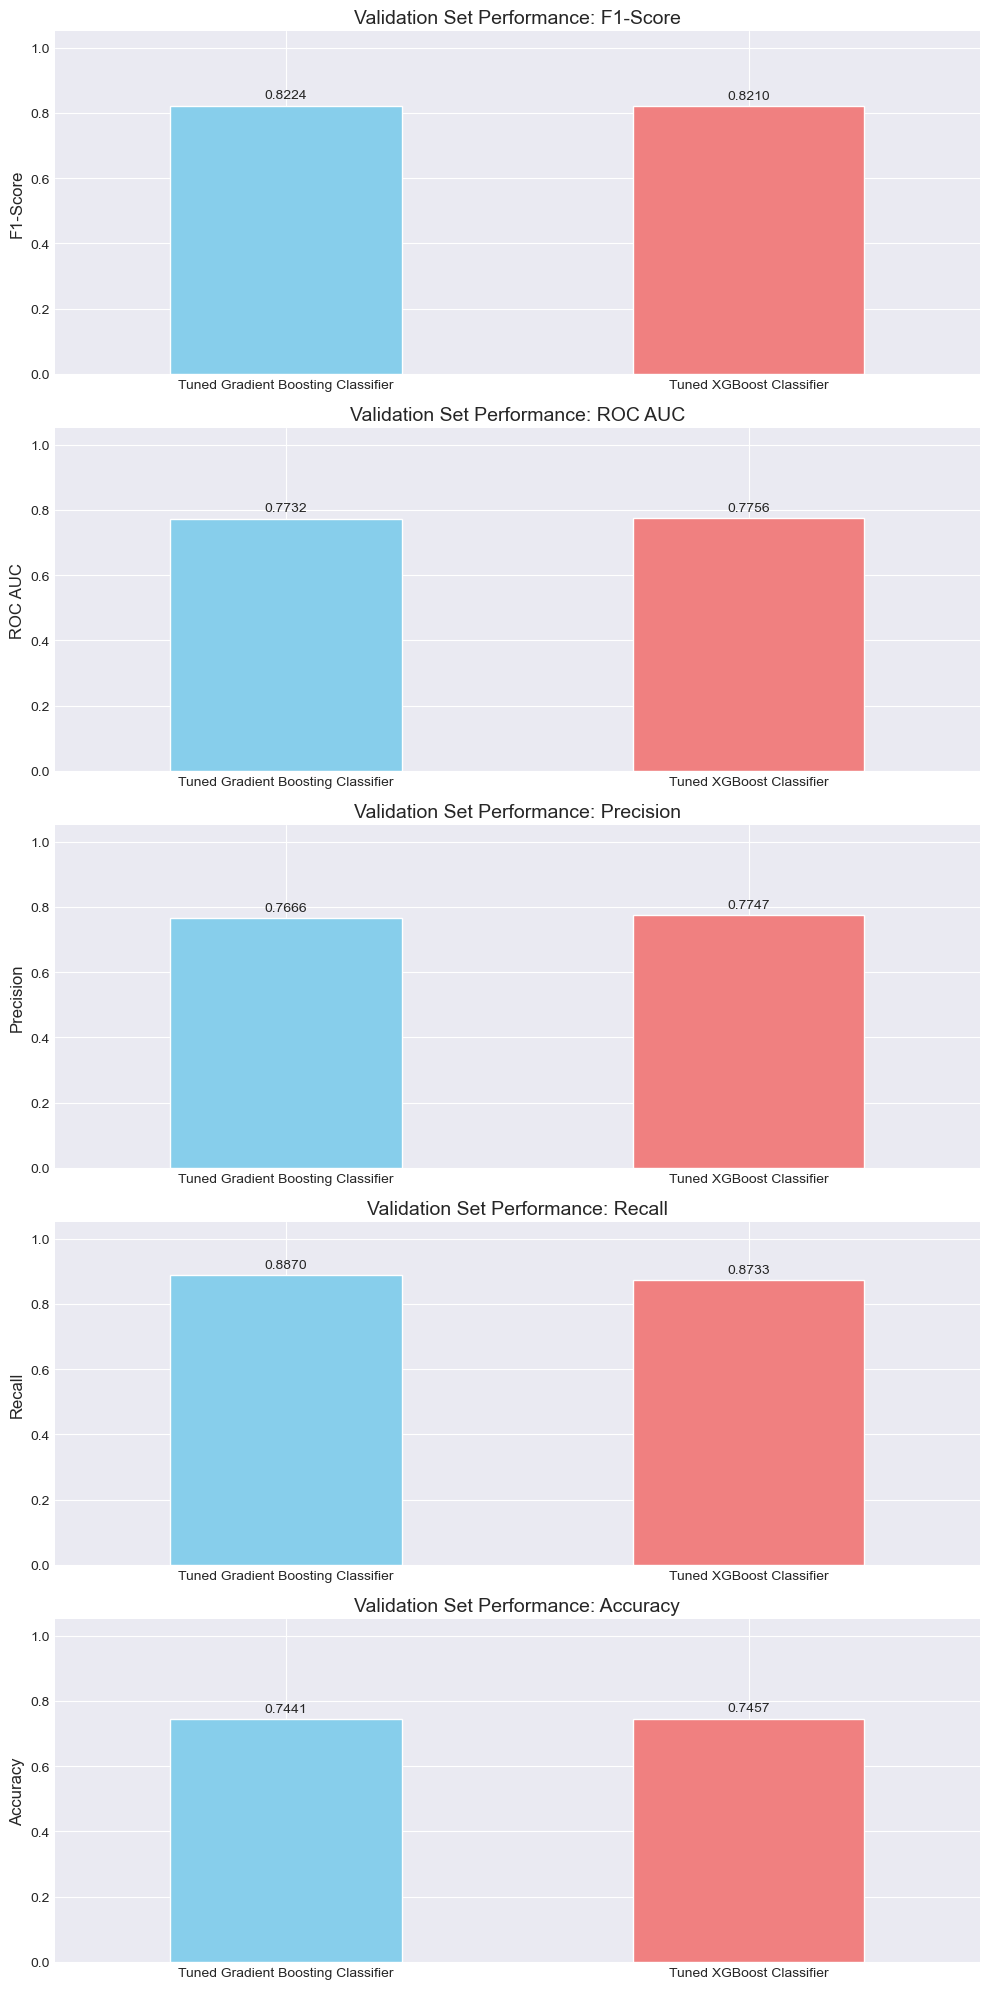

In [157]:
# --- Store evaluation results ---
validation_results = {}

models_to_evaluate = {
    "Tuned Gradient Boosting Classifier": best_gb_model,
    "Tuned XGBoost Classifier": best_xgb_model
}

print("--- Evaluating Tuned Models on Validation Set ---")

for name, model in models_to_evaluate.items():
    print(f"\nEvaluating {name}...")
    y_pred = model.predict(x_valid)
    y_proba = model.predict_proba(x_valid)[:, 1] # Probability of the positive class

    f1 = f1_score(y_valid, y_pred)
    roc_auc = roc_auc_score(y_valid, y_proba)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    accuracy = accuracy_score(y_valid, y_pred)
    cm = confusion_matrix(y_valid, y_pred)

    validation_results[name] = {
        'F1-Score': f1,
        'ROC AUC': roc_auc,
        'Precision': precision,
        'Recall': recall,
        'Accuracy': accuracy
    }

    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  Accuracy: {accuracy:.4f}")
    print("  Confusion Matrix:\n", cm)
    print("  Classification Report:\n", classification_report(y_valid, y_pred))

# --- Convert results to DataFrame for plotting ---
validation_results_df = pd.DataFrame(validation_results).T
print("\n--- Validation Results Summary (Tuned Models) ---")
print(validation_results_df.to_markdown(floatfmt=".4f"))

# --- Plotting the Comparison ---
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-darkgrid')

metrics_to_plot = ['F1-Score', 'ROC AUC', 'Precision', 'Recall', 'Accuracy']
n_metrics = len(metrics_to_plot)

fig, axes = plt.subplots(n_metrics, 1, figsize=(10, 4 * n_metrics)) # Adjust figure size

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i] if n_metrics > 1 else axes # Handle single subplot case
    validation_results_df[metric].plot(kind='bar', ax=ax, color=['skyblue', 'lightcoral'])
    ax.set_title(f'Validation Set Performance: {metric}', fontsize=14)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_ylim(bottom=0, top=1.05) # Metrics are usually between 0 and 1
    ax.tick_params(axis='x', rotation=0) # No rotation needed for 2 bars

    # Add value labels on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.4f', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()


--- Evaluating Final Tuned Models on Test Set ---

Evaluating Final Tuned Gradient Boosting Classifier...
  F1-Score: 0.8157
  ROC AUC: 0.7696
  Precision: 0.7641
  Recall: 0.8748
  Confusion Matrix:
 [[116 138]
 [ 64 447]]
  Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.46      0.53       254
           1       0.76      0.87      0.82       511

    accuracy                           0.74       765
   macro avg       0.70      0.67      0.68       765
weighted avg       0.72      0.74      0.72       765


Evaluating Final Tuned XGBoost Classifier...
  F1-Score: 0.8119
  ROC AUC: 0.7706
  Precision: 0.7711
  Recall: 0.8571
  Confusion Matrix:
 [[124 130]
 [ 73 438]]
  Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.49      0.55       254
           1       0.77      0.86      0.81       511

    accuracy                           0.73       765
   macro avg   

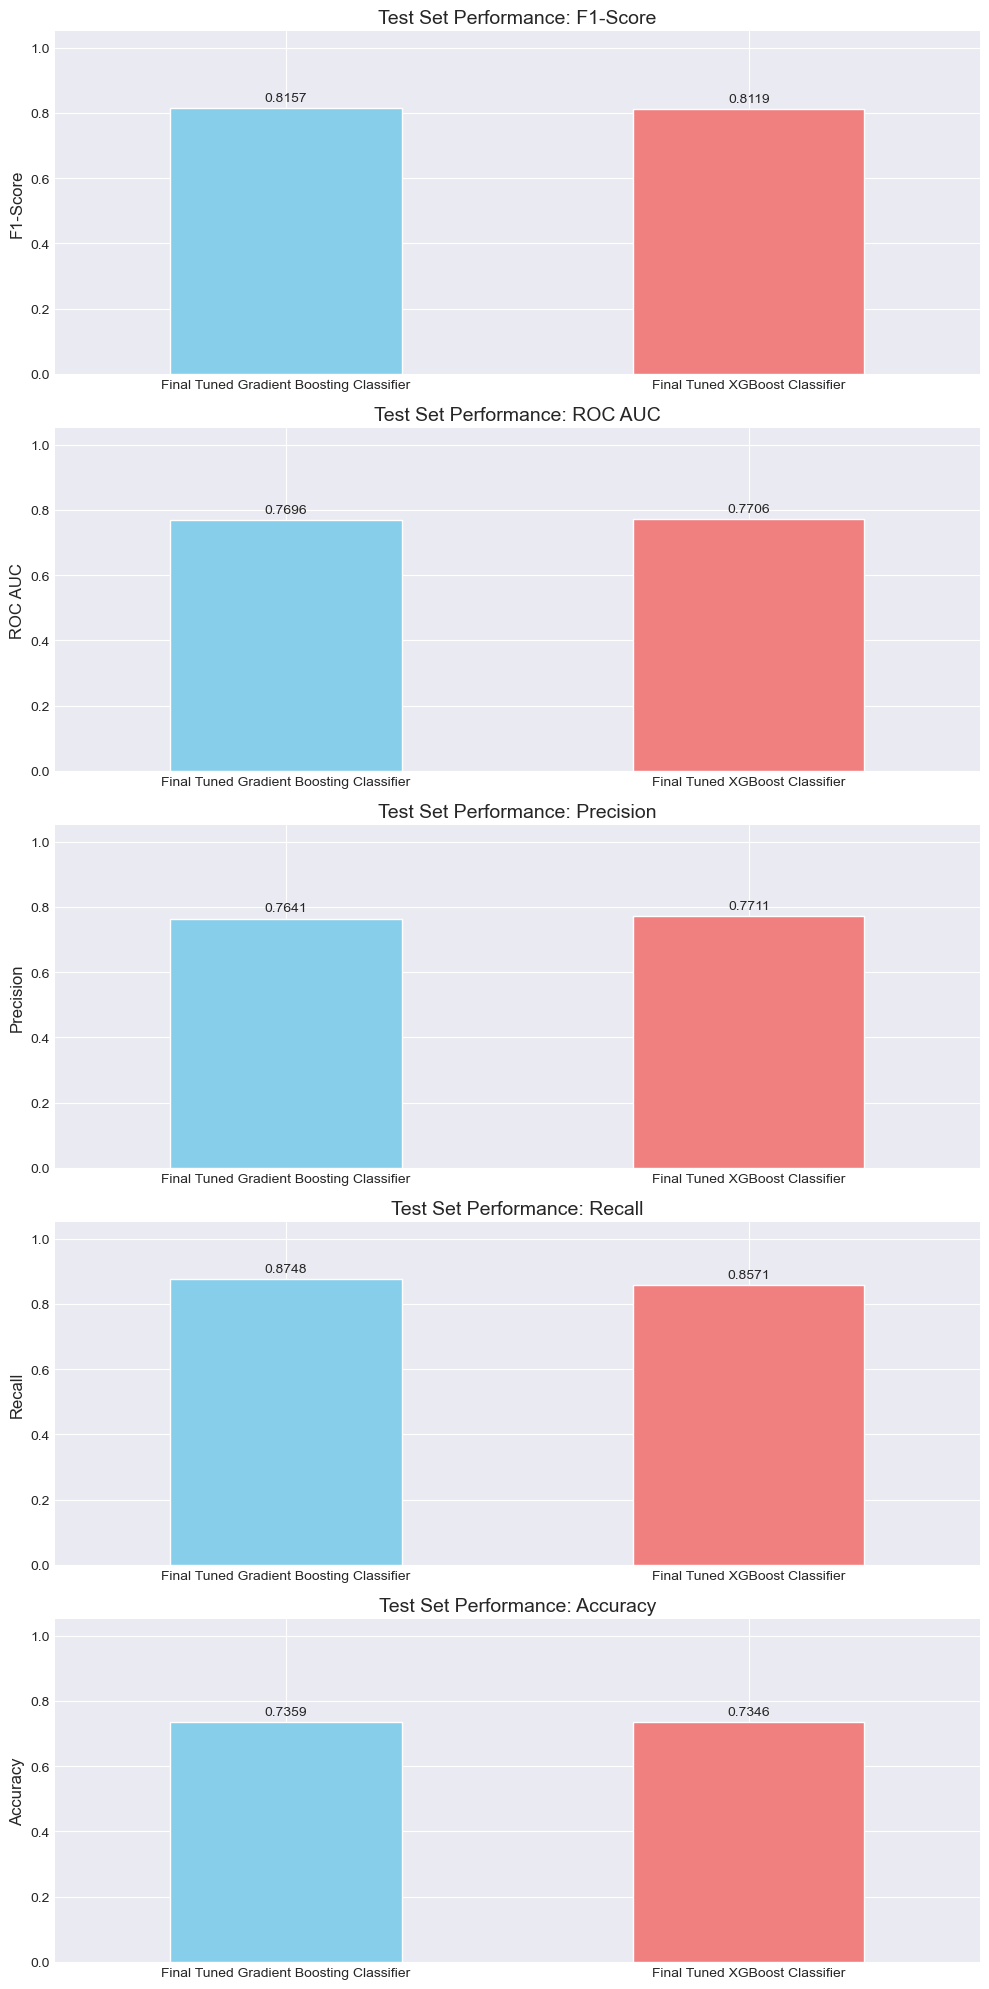

In [160]:
# --- Store evaluation results ---
test_results = {}

# List the models you want to finally evaluate
# If you definitively chose one model based on validation, you can just include that one.
# Here, we'll compare both GBC and XGBoost on the test set.
final_models_to_evaluate = {
    "Final Tuned Gradient Boosting Classifier": best_gb_model,
    "Final Tuned XGBoost Classifier": best_xgb_model
}

print("--- Evaluating Final Tuned Models on Test Set ---")

for name, model in final_models_to_evaluate.items():
    print(f"\nEvaluating {name}...")
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1] # Probability of the positive class

    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    test_results[name] = {
        'F1-Score': f1,
        'ROC AUC': roc_auc,
        'Precision': precision,
        'Recall': recall,
        'Accuracy': accuracy
    }

    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    f"  Accuracy: {accuracy:.4f}"
    print("  Confusion Matrix:\n", cm)
    print("  Classification Report:\n", classification_report(y_test, y_pred))

# --- Convert results to DataFrame for summary ---
test_results_df = pd.DataFrame(test_results).T
print("\n--- Final Test Results Summary (Tuned Models) ---")
print(test_results_df.to_markdown(floatfmt=".4f"))

# --- Optional: Plotting the Final Comparison (similar to validation plots) ---
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-darkgrid')

metrics_to_plot = ['F1-Score', 'ROC AUC', 'Precision', 'Recall', 'Accuracy']
n_metrics = len(metrics_to_plot)

fig, axes = plt.subplots(n_metrics, 1, figsize=(10, 4 * n_metrics))

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i] if n_metrics > 1 else axes # Handle single subplot case
    test_results_df[metric].plot(kind='bar', ax=ax, color=['skyblue', 'lightcoral'])
    ax.set_title(f'Test Set Performance: {metric}', fontsize=14)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_ylim(bottom=0, top=1.05)
    ax.tick_params(axis='x', rotation=0)

    for container in ax.containers:
        ax.bar_label(container, fmt='%.4f', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

## Actionable Insights and Recommendations

# Final Actionable Insights and Recommendations for Visa Approval Prediction

This section summarizes the key outcomes of our machine learning model development for predicting visa application approval. Our primary objective was to build a robust model that can accurately predict visa outcomes, balancing the identification of approved cases (recall) with the reliability of those predictions (precision), as measured by the F1-score.

## 1. Project Goal Recap

The goal of this project was to develop a predictive model that can assess visa applications and determine the likelihood of approval. This aims to:
* **Streamline the visa application review process.**
* **Improve efficiency** for visa officers.
* **Potentially reduce manual workload** on straightforward cases.
* **Provide data-driven insights** for decision-making.

## 2. Key Findings & Model Performance

After a comprehensive process involving data exploration, preprocessing, multiple model evaluations (on original, oversampled, and undersampled data), and hyperparameter tuning, we have identified a top-performing model.

### Chosen Model: Tuned Gradient Boosting Classifier

Our analysis concluded that the **Tuned Gradient Boosting Classifier** is the optimal model for this task, primarily due to its leading F1-score on the unseen test dataset.

### Final Performance Metrics on Test Set

The performance of our selected Tuned Gradient Boosting Classifier on the held-out test set is as follows:

| Metric    | Score    |
| :-------- | :------- |
| **F1-Score** | **0.8157** |
| ROC AUC   | 0.7696   |
| Precision | 0.7641   |
| Recall    | 0.8748   |
| Accuracy  | 0.7359   |

**Confusion Matrix for Tuned Gradient Boosting Classifier:**

|                   | Predicted Not Certified (0) | Predicted Certified (1) |
| :---------------- | :-------------------------- | :---------------------- |
| **Actual Not Certified (0)** | 116                         | 138                     |
| **Actual Certified (1)** | 64                          | 447                     |

### Interpretation of Metrics:

* **F1-Score (0.8157):** This is a strong F1-score, indicating an excellent balance between precision and recall for the "Certified" class. The model is effective at identifying certified applications while keeping false positives and false negatives balanced.
* **Recall (0.8748):** The model successfully identifies almost **87.5%** of all actual "Certified" visa applications. This means it's very good at not missing approvals.
* **Precision (0.7641):** When the model predicts an application as "Certified," it is correct approximately **76.4%** of the time. This means roughly one-quarter of its "Certified" predictions are actually "Not Certified" (False Positives).
* **ROC AUC (0.7696):** This indicates good overall discriminative ability of the model.

### Impact of Data Balancing Strategies:

Our extensive evaluation revealed that training models on the **original, imbalanced dataset** yielded the highest F1-scores. While oversampling techniques like SMOTE significantly improved the ROC AUC (overall discriminative power), they generally led to a slight decrease in F1-score, suggesting a change in the precision-recall balance that was less optimal for our primary metric. Undersampling, conversely, proved detrimental to performance. This highlights that the most effective approach was to allow the model to learn from the natural distribution of the data, then let the F1-score optimization balance the trade-offs.

## 3. Actionable Insights & Business Recommendations

Based on the performance of our Tuned Gradient Boosting Classifier, we propose the following actionable insights and recommendations:

1.  **Streamline Application Review:**
    * **High-Confidence Predictions:** Applications that the model predicts as "Certified" with a high probability (e.g., >0.7 or >0.8, a threshold that can be fine-tuned) could potentially be moved to a fast-track or reduced-review queue, significantly accelerating processing times for these applications.
    * **Flagging for Scrutiny:** Applications predicted as "Not Certified" or those predicted as "Certified" but with lower confidence (e.g., probabilities between 0.4 and 0.6) should be flagged for detailed human review. This allows officers to focus their time where it's most needed.

2.  **Optimize Resource Allocation:**
    * By automating parts of the review process, visa officers can dedicate more time and resources to complex, ambiguous, or higher-risk cases. This leads to more efficient use of human capital.

3.  **Data-Driven Risk Identification:**
    * The model can serve as an early warning system. While its precision is good, the **138 False Positives** (applications predicted as "Certified" but were actually "Not Certified") in the test set represent cases that might have been erroneously approved without the model's assistance. These are applications that require careful human oversight, especially if they imply any risk.

4.  **Enhanced Decision Support:**
    * The model doesn't replace human decision-making but acts as an intelligent assistant, providing a data-backed recommendation. This can improve the consistency and objectivity of visa approval decisions.

## 4. Limitations and Future Work

While the model performs very well, it's important to acknowledge its limitations and outline future enhancements:

### Limitations:

* **Model Snapshotted:** The model reflects patterns in the data it was trained on. Changes in visa policies, global events, or application demographics over time could reduce its accuracy.
* **Interpretability:** While Gradient Boosting is less of a "black box" than some other models, understanding the exact reasoning behind every single prediction requires further analysis.

### Future Enhancements:

1.  **Feature Importance Analysis:** Conduct a deep dive into the model's feature importances to understand *which specific applicant attributes* are most influential in predicting visa outcomes. This can provide valuable business intelligence about the characteristics of successful (or unsuccessful) applications.
2.  **Continuous Monitoring & Retraining:** Implement a system to continuously monitor the model's performance in production. If performance degrades over time (due to data drift or concept drift), the model should be periodically retrained on fresh data.
3.  **Threshold Optimization:** While we optimized for F1-score, a business might require a different balance of precision and recall (e.g., if minimizing false positives is more critical than maximizing recall, or vice-versa). The probability threshold can be adjusted on the validation set to meet specific operational goals.
4.  **Further Data Collection:** Investigate if additional relevant data points (e.g., more granular socio-economic indicators, specific historical application outcomes, or interview notes) could further improve model performance.

---
This concludes the initial development phase. The Tuned Gradient Boosting Classifier is ready for piloting or integration into a decision-support system, provided continuous monitoring is in place.

<font size=6 color='blue'>Power Ahead</font>
___